In [1]:
### I read the entire 700 page code book
# see 
# https://www2.census.gov/library/publications/cen2010/doc/sf1.pdf

In [109]:
import pandas as pd
import numpy as np
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import matplotlib.pyplot as plt
import sys
print(sys.version)
%matplotlib inline

2.7.13 |Anaconda 4.3.1 (64-bit)| (default, Dec 19 2016, 13:29:36) [MSC v.1500 64 bit (AMD64)]


In [64]:
df = pd.read_csv('./Cleaned_Data_Files_No_Headers/TN_clean_no_headers/tn_geo_cleaned_2010_no_header.txt', sep=',', header=None, names=['sf', 'st', 'a', 'b', 'c', 'location'], dtype=str)

In [65]:
df.head()

,sf,st,a,b,c,location
0,SF1ST,TN,40,00,0,Tennessee
1,SF1ST,TN,40,89,0,Tennessee
2,SF1ST,TN,40,90,0,Tennessee
3,SF1ST,TN,40,91,0,Tennessee
4,SF1ST,TN,40,92,0,Tennessee


In [66]:
q = "select * from df where location like '%County';"

In [6]:
###We can see from this set that the County keys are NOT unique.  We'll have to run the 
###Analysis using the index as keys.  The best way to do that is by using pandas 
### and calling with df.iloc

In [67]:
tn_geo = df

In [68]:
tn_geo.head()

,sf,st,a,b,c,location
0,SF1ST,TN,40,00,0,Tennessee
1,SF1ST,TN,40,89,0,Tennessee
2,SF1ST,TN,40,90,0,Tennessee
3,SF1ST,TN,40,91,0,Tennessee
4,SF1ST,TN,40,92,0,Tennessee


In [69]:
tn_county_map = pd.read_csv('tn_dist_county_map.csv', sep = ',')

In [70]:
tn_county_map.head()


,County,Congressional_District,District_of_Concern
0,Anderson County,3,no concerns
1,Bedford County,4,no concerns
2,Benton County,7,dist of concern
3,Benton County,8,no concerns
4,Bledsoe County,4,no concerns


In [71]:
tn_geo.shape

(277726, 6)

In [72]:
p10 = pd.read_csv('./Cleaned_Data_With_Text_Headers/TN_clean_with_text_headers/tn_p10_2010.txt', sep = '\t')

In [73]:
p10.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,Population_of_one_race,White_alone,Black_or_African_American_alone,American_Indian_and_Alaska_Native_alone,...,American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,Population_of_five_races,White__Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander,White__Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Some_Other_Race,White__Black_or_African_American__American_Indian_and_Alaska_Native__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,White__Black_or_African_American__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,White__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,Population_of_six_races,White__Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race
0,SF1ST,TN,0,4,1,4850104,4796259,3864797,755492,15355,...,3,96,84,4,0,1,5,2,3,3
1,SF1ST,TN,0,4,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SF1ST,TN,0,4,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SF1ST,TN,0,4,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SF1ST,TN,0,4,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
### get the list of indices that correspond to County data
tn_geo.columns

Index([u'sf', u'st', u'a', u'b', u'c', u'location'], dtype='object')

In [75]:
a = tn_geo[tn_geo['location'].str.contains("County")==True]
b = a[a['location'].str.contains("(part)")==False]
c = b[b['location'].str.contains("Schools")==False].index.values.tolist()

C:\Users\icwang\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


In [76]:
c

[19L,
 3277L,
 5728L,
 7457L,
 8691L,
 14025L,
 17703L,
 20211L,
 21020L,
 23578L,
 26245L,
 27553L,
 28622L,
 30456L,
 31116L,
 33720L,
 36780L,
 37931L,
 41568L,
 53952L,
 55441L,
 56520L,
 59429L,
 61562L,
 63996L,
 64975L,
 68245L,
 71844L,
 74719L,
 76149L,
 80616L,
 81939L,
 84536L,
 94286L,
 94968L,
 97244L,
 99847L,
 102906L,
 104495L,
 106686L,
 109417L,
 111907L,
 112844L,
 114942L,
 115659L,
 118416L,
 119569L,
 128927L,
 129501L,
 130896L,
 133776L,
 134864L,
 137087L,
 140493L,
 143672L,
 146056L,
 147179L,
 151013L,
 153245L,
 155276L,
 160102L,
 161231L,
 164396L,
 168516L,
 169061L,
 170356L,
 173022L,
 174258L,
 175501L,
 175983L,
 177729L,
 181408L,
 183407L,
 187138L,
 189488L,
 195100L,
 196749L,
 197605L,
 202341L,
 221603L,
 222915L,
 224588L,
 230904L,
 235294L,
 236945L,
 237420L,
 238743L,
 239930L,
 240614L,
 242530L,
 247350L,
 249342L,
 252212L,
 253643L,
 258611L,
 263544L,
 263545L,
 263977L,
 263978L,
 265280L,
 265283L,
 265286L,
 265287L,
 265288L,
 265

In [77]:
indices = []
indices = [0]
for county in c:
    indices.append(county)
indices

[0,
 19L,
 3277L,
 5728L,
 7457L,
 8691L,
 14025L,
 17703L,
 20211L,
 21020L,
 23578L,
 26245L,
 27553L,
 28622L,
 30456L,
 31116L,
 33720L,
 36780L,
 37931L,
 41568L,
 53952L,
 55441L,
 56520L,
 59429L,
 61562L,
 63996L,
 64975L,
 68245L,
 71844L,
 74719L,
 76149L,
 80616L,
 81939L,
 84536L,
 94286L,
 94968L,
 97244L,
 99847L,
 102906L,
 104495L,
 106686L,
 109417L,
 111907L,
 112844L,
 114942L,
 115659L,
 118416L,
 119569L,
 128927L,
 129501L,
 130896L,
 133776L,
 134864L,
 137087L,
 140493L,
 143672L,
 146056L,
 147179L,
 151013L,
 153245L,
 155276L,
 160102L,
 161231L,
 164396L,
 168516L,
 169061L,
 170356L,
 173022L,
 174258L,
 175501L,
 175983L,
 177729L,
 181408L,
 183407L,
 187138L,
 189488L,
 195100L,
 196749L,
 197605L,
 202341L,
 221603L,
 222915L,
 224588L,
 230904L,
 235294L,
 236945L,
 237420L,
 238743L,
 239930L,
 240614L,
 242530L,
 247350L,
 249342L,
 252212L,
 253643L,
 258611L,
 263544L,
 263545L,
 263977L,
 263978L,
 265280L,
 265283L,
 265286L,
 265287L,
 265288L,


In [78]:
len(indices)

511

In [79]:
p10.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,Population_of_one_race,White_alone,Black_or_African_American_alone,American_Indian_and_Alaska_Native_alone,...,American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,Population_of_five_races,White__Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander,White__Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Some_Other_Race,White__Black_or_African_American__American_Indian_and_Alaska_Native__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,White__Black_or_African_American__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,White__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,Population_of_six_races,White__Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race
0,SF1ST,TN,0,4,1,4850104,4796259,3864797,755492,15355,...,3,96,84,4,0,1,5,2,3,3
1,SF1ST,TN,0,4,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SF1ST,TN,0,4,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SF1ST,TN,0,4,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SF1ST,TN,0,4,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
p10.columns

Index([u'FILEID', u'STUSAB', u'CHARITER', u'CIFSN', u'LOGRECNO', u'Total',
       u'Population_of_one_race', u'White_alone',
       u'Black_or_African_American_alone',
       u'American_Indian_and_Alaska_Native_alone', u'Asian_alone',
       u'Native_Hawaiian_and_Other_Pacific_Islander_alone',
       u'Some_Other_Race_alone', u'Two_or_More_Races',
       u'Population_of_two_races', u'White__Black_or_African_American',
       u'White__American_Indian_and_Alaska_Native', u'White__Asian',
       u'White__Native_Hawaiian_and_Other_Pacific_Islander',
       u'White__Some_Other_Race',
       u'Black_or_African_American__American_Indian_and_Alaska_Native',
       u'Black_or_African_American__Asian',
       u'Black_or_African_American__Native_Hawaiian_and_Other_Pacific_Islander',
       u'Black_or_African_American__Some_Other_Race',
       u'American_Indian_and_Alaska_Native__Asian',
       u'American_Indian_and_Alaska_Native__Native_Hawaiian_and_Other_Pacific_Islander',
       u'American_Indi

In [81]:
p8 = pd.read_csv('./Cleaned_Data_With_Text_Headers/TN_clean_with_text_headers/tn_p8_2010.txt', sep = '\t')

In [82]:
p8.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,Population_of_one_race,White_alone,Black_or_African_American_alone,American_Indian_and_Alaska_Native_alone,...,American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,Population_of_five_races,White__Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander,White__Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Some_Other_Race,White__Black_or_African_American__American_Indian_and_Alaska_Native__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,White__Black_or_African_American__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,White__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race,Population_of_six_races,White__Black_or_African_American__American_Indian_and_Alaska_Native__Asian__Native_Hawaiian_and_Other_Pacific_Islander__Some_Other_Race
0,SF1ST,TN,0,3,1,6346105,6236096,4921948,1057315,19994,...,3,137,116,9,0,3,7,2,4,4
1,SF1ST,TN,0,3,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SF1ST,TN,0,3,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SF1ST,TN,0,3,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SF1ST,TN,0,3,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
p8.columns
p8_cols = ['FILEID', 'STUSAB', 'CHARITER', 'CIFSN', 'LOGRECNO','Total','White_alone','Black_or_African_American_alone','Asian_alone']

In [84]:
p8_edited = p8[p8_cols]

In [85]:
p8_edited.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone
0,SF1ST,TN,0,3,1,6346105,4921948,1057315,91242
1,SF1ST,TN,0,3,2,0,0,0,0
2,SF1ST,TN,0,3,3,0,0,0,0
3,SF1ST,TN,0,3,4,0,0,0,0
4,SF1ST,TN,0,3,5,0,0,0,0


In [86]:
#p8 is highly complex, D4D only wanted high level data, so let's use p3
p3 = pd.read_csv('./Cleaned_Data_With_Text_Headers/TN_clean_with_text_headers/tn_p3_2010.txt', sep = '\t')

In [87]:
p3.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,American_Indian_and_Alaska_Native_alone,Asian_alone,Native_Hawaiian_and_Other_Pacific_Islander_alone,Some_Other_Race_alone,Two_or_More_Races
0,SF1ST,TN,0,3,1,6346105,4921948,1057315,19994,91242,3642,141955,110009
1,SF1ST,TN,0,3,2,0,0,0,0,0,0,0,0
2,SF1ST,TN,0,3,3,0,0,0,0,0,0,0,0
3,SF1ST,TN,0,3,4,0,0,0,0,0,0,0,0
4,SF1ST,TN,0,3,5,0,0,0,0,0,0,0,0


In [88]:
p3.shape

(277726, 13)

In [89]:
p3_edited = p3[p8_cols]

In [90]:
p3_edited.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone
0,SF1ST,TN,0,3,1,6346105,4921948,1057315,91242
1,SF1ST,TN,0,3,2,0,0,0,0
2,SF1ST,TN,0,3,3,0,0,0,0
3,SF1ST,TN,0,3,4,0,0,0,0
4,SF1ST,TN,0,3,5,0,0,0,0


In [91]:
p8.columns

Index([u'FILEID', u'STUSAB', u'CHARITER', u'CIFSN', u'LOGRECNO', u'Total',
       u'Population_of_one_race', u'White_alone',
       u'Black_or_African_American_alone',
       u'American_Indian_and_Alaska_Native_alone', u'Asian_alone',
       u'Native_Hawaiian_and_Other_Pacific_Islander_alone',
       u'Some_Other_Race_alone', u'Two_or_More_Races',
       u'Population_of_two_races', u'White__Black_or_African_American',
       u'White__American_Indian_and_Alaska_Native', u'White__Asian',
       u'White__Native_Hawaiian_and_Other_Pacific_Islander',
       u'White__Some_Other_Race',
       u'Black_or_African_American__American_Indian_and_Alaska_Native',
       u'Black_or_African_American__Asian',
       u'Black_or_African_American__Native_Hawaiian_and_Other_Pacific_Islander',
       u'Black_or_African_American__Some_Other_Race',
       u'American_Indian_and_Alaska_Native__Asian',
       u'American_Indian_and_Alaska_Native__Native_and_Other_Pacific_Islander',
       u'American_Indian_and_Al

In [92]:
### p3 doesn't include latinos, but p4 does
p4 = pd.read_csv('./Cleaned_Data_With_Text_Headers/TN_clean_with_text_headers/tn_p4_2010.txt', sep = '\t')

In [93]:
p4.columns

Index([u'FILEID', u'STUSAB', u'CHARITER', u'CIFSN', u'LOGRECNO', u'Total',
       u'Not_Hispanic_or_Latino_', u'Hispanic_or_Latino'],
      dtype='object')

In [94]:
p4.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,Not_Hispanic_or_Latino_,Hispanic_or_Latino
0,SF1ST,TN,0,3,1,6346105,6056046,290059
1,SF1ST,TN,0,3,2,0,0,0
2,SF1ST,TN,0,3,3,0,0,0
3,SF1ST,TN,0,3,4,0,0,0
4,SF1ST,TN,0,3,5,0,0,0


In [95]:
#p5 combines race and latino origin
p5 = pd.read_csv('./Cleaned_Data_With_Text_Headers/TN_clean_with_text_headers/tn_p5_2010.txt', sep = '\t')

In [96]:
p5.head()


,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,Not_Hispanic_or_Latino,White_alone,Black_or_African_American_alone,American_Indian_and_Alaska_Native_alone,...,Some_Other_Race_alone,Two_or_More_Races,Hispanic_or_Latino_,White_alone.1,Black_or_African_American_alone.1,American_Indian_and_Alaska_Native_alone.1,Asian_alone.1,Native_Hawaiian_and_Other_Pacific_Islander_alone_.1,Some_Other_Race_alone.1,Two_or_More_Races.1
0,SF1ST,TN,0,3,1,6346105,6056046,4800782,1049391,16302,...,6422,90071,290059,121166,7924,3692,931,875,135533,19938
1,SF1ST,TN,0,3,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SF1ST,TN,0,3,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SF1ST,TN,0,3,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SF1ST,TN,0,3,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
p5.columns

Index([u'FILEID', u'STUSAB', u'CHARITER', u'CIFSN', u'LOGRECNO', u'Total',
       u'Not_Hispanic_or_Latino', u'White_alone',
       u'Black_or_African_American_alone',
       u'American_Indian_and_Alaska_Native_alone', u'Asian_alone',
       u'Native_Hawaiian_and_Other_Pacific_Islander_alone_',
       u'Some_Other_Race_alone', u'Two_or_More_Races', u'Hispanic_or_Latino_',
       u'White_alone.1', u'Black_or_African_American_alone.1',
       u'American_Indian_and_Alaska_Native_alone.1', u'Asian_alone.1',
       u'Native_Hawaiian_and_Other_Pacific_Islander_alone_.1',
       u'Some_Other_Race_alone.1', u'Two_or_More_Races.1'],
      dtype='object')

In [98]:
p5[['Not_Hispanic_or_Latino', 'White_alone',
       'Black_or_African_American_alone',
       'Asian_alone',
       'Hispanic_or_Latino_',
       'White_alone.1', 'Black_or_African_American_alone.1',
       'American_Indian_and_Alaska_Native_alone.1', 'Asian_alone.1']]

,Not_Hispanic_or_Latino,White_alone,Black_or_African_American_alone,Asian_alone,Hispanic_or_Latino_,White_alone.1,Black_or_African_American_alone.1,American_Indian_and_Alaska_Native_alone.1,Asian_alone.1
0,6056046,4800782,1049391,90311,290059,121166,7924,3692,931
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0
8,5431346,4232628,1004720,88544,276568,115176,7628,3489,895
9,2277495,1377263,796809,49958,177107,67557,5797,2145,522


In [99]:
indices

[0,
 19L,
 3277L,
 5728L,
 7457L,
 8691L,
 14025L,
 17703L,
 20211L,
 21020L,
 23578L,
 26245L,
 27553L,
 28622L,
 30456L,
 31116L,
 33720L,
 36780L,
 37931L,
 41568L,
 53952L,
 55441L,
 56520L,
 59429L,
 61562L,
 63996L,
 64975L,
 68245L,
 71844L,
 74719L,
 76149L,
 80616L,
 81939L,
 84536L,
 94286L,
 94968L,
 97244L,
 99847L,
 102906L,
 104495L,
 106686L,
 109417L,
 111907L,
 112844L,
 114942L,
 115659L,
 118416L,
 119569L,
 128927L,
 129501L,
 130896L,
 133776L,
 134864L,
 137087L,
 140493L,
 143672L,
 146056L,
 147179L,
 151013L,
 153245L,
 155276L,
 160102L,
 161231L,
 164396L,
 168516L,
 169061L,
 170356L,
 173022L,
 174258L,
 175501L,
 175983L,
 177729L,
 181408L,
 183407L,
 187138L,
 189488L,
 195100L,
 196749L,
 197605L,
 202341L,
 221603L,
 222915L,
 224588L,
 230904L,
 235294L,
 236945L,
 237420L,
 238743L,
 239930L,
 240614L,
 242530L,
 247350L,
 249342L,
 252212L,
 253643L,
 258611L,
 263544L,
 263545L,
 263977L,
 263978L,
 265280L,
 265283L,
 265286L,
 265287L,
 265288L,


In [100]:
p5_edited = p5[['FILEID', 'STUSAB', 'CHARITER', 'CIFSN', 'LOGRECNO','Total',
    'White_alone','Black_or_African_American_alone','Asian_alone','Hispanic_or_Latino_']].ix[indices]

In [101]:
p5_edited.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone,Hispanic_or_Latino_
0,SF1ST,TN,0,3,1,6346105,4800782,1049391,90311,290059
19,SF1ST,TN,0,3,20,75129,68134,2817,796,1768
3277,SF1ST,TN,0,3,3278,45058,35389,3437,339,5083
5728,SF1ST,TN,0,3,5729,16489,15563,321,62,291
7457,SF1ST,TN,0,3,7458,12876,11936,469,17,255


In [102]:
def percentages(df):
    if df['Total'] == 0:
        df['caucasian_percentage'] = 0
        df['african_percentage'] = 0
        df['asian_percentage'] = 0
        df['latino_percentage'] = 0
    else:
        df['caucasian_percentage'] = float(df['White_alone'])/df['Total']
        df['african_percentage'] = float(df['Black_or_African_American_alone'])/df['Total']
        df['asian_percentage'] = float(df['Asian_alone'])/df['Total']
        df['latino_percentage'] = float(df['Hispanic_or_Latino_'])/df['Total']
    return df

p5_percent = p5_edited.apply(percentages, axis=1)

In [103]:
p5_percent.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone,Hispanic_or_Latino_,caucasian_percentage,african_percentage,asian_percentage,latino_percentage
0,SF1ST,TN,0,3,1,6346105,4800782,1049391,90311,290059,0.756493,0.165360,0.014231,0.045707
19,SF1ST,TN,0,3,20,75129,68134,2817,796,1768,0.906893,0.037496,0.010595,0.023533
3277,SF1ST,TN,0,3,3278,45058,35389,3437,339,5083,0.785410,0.076279,0.007524,0.112810
5728,SF1ST,TN,0,3,5729,16489,15563,321,62,291,0.943841,0.019468,0.003760,0.017648
7457,SF1ST,TN,0,3,7458,12876,11936,469,17,255,0.926996,0.036424,0.001320,0.019804


In [104]:
p5_percent.tail()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone,Hispanic_or_Latino_,caucasian_percentage,african_percentage,asian_percentage,latino_percentage
277719,SF1ST,TN,0,3,277720,17021,15535,975,30,277,0.912696,0.057282,0.001763,0.016274
277720,SF1ST,TN,0,3,277721,35021,30696,2717,365,700,0.876503,0.077582,0.010422,0.019988
277722,SF1ST,TN,0,3,277723,25841,24496,450,69,425,0.947951,0.017414,0.002670,0.016447
277723,SF1ST,TN,0,3,277724,147489,132127,4395,4593,4155,0.895843,0.029799,0.031141,0.028172
277724,SF1ST,TN,0,3,277725,84298,76160,3841,900,1945,0.903462,0.045565,0.010676,0.023073


In [105]:
p5_w_county_name = pd.concat([tn_geo['location'].ix[indices], p5_percent], axis=1)

In [106]:
p5_w_county_name.head()

,location,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone,Hispanic_or_Latino_,caucasian_percentage,african_percentage,asian_percentage,latino_percentage
0,Tennessee,SF1ST,TN,0,3,1,6346105,4800782,1049391,90311,290059,0.756493,0.165360,0.014231,0.045707
19,Anderson County,SF1ST,TN,0,3,20,75129,68134,2817,796,1768,0.906893,0.037496,0.010595,0.023533
3277,Bedford County,SF1ST,TN,0,3,3278,45058,35389,3437,339,5083,0.785410,0.076279,0.007524,0.112810
5728,Benton County,SF1ST,TN,0,3,5729,16489,15563,321,62,291,0.943841,0.019468,0.003760,0.017648
7457,Bledsoe County,SF1ST,TN,0,3,7458,12876,11936,469,17,255,0.926996,0.036424,0.001320,0.019804


In [107]:
q = 'select p.*, c.* from p5_w_county_name p join tn_county_map c on c.County = p.location;'

In [110]:
comb = pysqldf(q)
comb.head()

,location,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone,Hispanic_or_Latino_,caucasian_percentage,african_percentage,asian_percentage,latino_percentage,County,Congressional_District,District_of_Concern
0,Anderson County,SF1ST,TN,0,3,20,75129,68134,2817,796,1768,0.906893,0.037496,0.010595,0.023533,Anderson County,3,no concerns
1,Bedford County,SF1ST,TN,0,3,3278,45058,35389,3437,339,5083,0.785410,0.076279,0.007524,0.112810,Bedford County,4,no concerns
2,Benton County,SF1ST,TN,0,3,5729,16489,15563,321,62,291,0.943841,0.019468,0.003760,0.017648,Benton County,7,dist of concern
3,Benton County,SF1ST,TN,0,3,5729,16489,15563,321,62,291,0.943841,0.019468,0.003760,0.017648,Benton County,8,no concerns
4,Bledsoe County,SF1ST,TN,0,3,7458,12876,11936,469,17,255,0.926996,0.036424,0.001320,0.019804,Bledsoe County,4,no concerns


In [111]:
comb.tail()
#comb_all = pd.concat([p5_w_county_name.ix[0],comb], axis =1)

,location,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone,Hispanic_or_Latino_,caucasian_percentage,african_percentage,asian_percentage,latino_percentage,County,Congressional_District,District_of_Concern
418,Gibson County,SF1ST,TN,0,3,275202,49683,38571,9307,106,1012,0.776342,0.187328,0.002134,0.020369,Gibson County,8,no concerns
419,Haywood County,SF1ST,TN,0,3,275307,18787,8419,9431,21,723,0.448129,0.501996,0.001118,0.038484,Haywood County,8,no concerns
420,Crockett County,SF1ST,TN,0,3,275358,14586,11253,1837,25,1274,0.771493,0.125943,0.001714,0.087344,Crockett County,8,no concerns
421,Lauderdale County,SF1ST,TN,0,3,275393,27815,17035,9676,55,564,0.612439,0.347870,0.001977,0.020277,Lauderdale County,8,no concerns
422,Fayette County,SF1ST,TN,0,3,275756,38413,26193,10742,186,858,0.681879,0.279645,0.004842,0.022336,Fayette County,8,no concerns


In [112]:
tn_county_map.head()

,County,Congressional_District,District_of_Concern
0,Anderson County,3,no concerns
1,Bedford County,4,no concerns
2,Benton County,7,dist of concern
3,Benton County,8,no concerns
4,Bledsoe County,4,no concerns


In [113]:
comb.shape

(423, 18)

In [114]:
comb_all = pd.concat([pd.DataFrame(p5_w_county_name.ix[0]).T,comb], axis =0)

In [115]:
comb_all.head()

,Asian_alone,Black_or_African_American_alone,CHARITER,CIFSN,Congressional_District,County,District_of_Concern,FILEID,Hispanic_or_Latino_,LOGRECNO,STUSAB,Total,White_alone,african_percentage,asian_percentage,caucasian_percentage,latino_percentage,location
0,90311,1049391,0,3,NaN,NaN,NaN,SF1ST,290059,1,TN,6346105,4800782,0.16536,0.0142309,0.756493,0.0457066,Tennessee
0,796,2817,0,3,3.0,Anderson County,no concerns,SF1ST,1768,20,TN,75129,68134,0.0374955,0.0105951,0.906893,0.0235329,Anderson County
1,339,3437,0,3,4.0,Bedford County,no concerns,SF1ST,5083,3278,TN,45058,35389,0.0762795,0.00752364,0.78541,0.11281,Bedford County
2,62,321,0,3,7.0,Benton County,dist of concern,SF1ST,291,5729,TN,16489,15563,0.0194675,0.00376008,0.943841,0.0176481,Benton County
3,62,321,0,3,8.0,Benton County,no concerns,SF1ST,291,5729,TN,16489,15563,0.0194675,0.00376008,0.943841,0.0176481,Benton County


In [116]:
dists = pd.concat([pd.DataFrame(p5_w_county_name.ix[0]).T,comb_all[comb_all['District_of_Concern'] == 'dist of concern']], axis = 0)

In [117]:
dists.head()

,Asian_alone,Black_or_African_American_alone,CHARITER,CIFSN,Congressional_District,County,District_of_Concern,FILEID,Hispanic_or_Latino_,LOGRECNO,STUSAB,Total,White_alone,african_percentage,asian_percentage,caucasian_percentage,latino_percentage,location
0,90311,1049391,0,3,NaN,NaN,NaN,SF1ST,290059,1,TN,6346105,4800782,0.16536,0.0142309,0.756493,0.0457066,Tennessee
2,62,321,0,3,7.0,Benton County,dist of concern,SF1ST,291,5729,TN,16489,15563,0.0194675,0.00376008,0.943841,0.0176481,Benton County
15,53,1561,0,3,7.0,Chester County,dist of concern,SF1ST,343,27554,TN,17131,14837,0.0911214,0.00309381,0.866091,0.0200222,Chester County
23,25,337,0,3,7.0,Decatur County,dist of concern,SF1ST,308,53953,TN,11757,10947,0.0286638,0.00212639,0.931105,0.0261972,Decatur County
31,111,3006,0,3,7.0,Giles County,dist of concern,SF1ST,471,71845,TN,29485,25221,0.10195,0.00376463,0.855384,0.0159742,Giles County


In [118]:
dists[['location','african_percentage','asian_percentage','caucasian_percentage','latino_percentage']]

,location,african_percentage,asian_percentage,caucasian_percentage,latino_percentage
0,Tennessee,0.16536,0.0142309,0.756493,0.0457066
2,Benton County,0.0194675,0.00376008,0.943841,0.0176481
15,Chester County,0.0911214,0.00309381,0.866091,0.0200222
23,Decatur County,0.0286638,0.00212639,0.931105,0.0261972
31,Giles County,0.10195,0.00376463,0.855384,0.0159742
38,Hardeman County,0.411991,0.00532052,0.557627,0.0137966
39,Hardin County,0.0341197,0.00391916,0.926381,0.0190963
42,Henderson County,0.0781087,0.00273686,0.881631,0.0191581
44,Hickman County,0.0446335,0.0019036,0.917659,0.0184285
45,Houston County,0.0225493,0.00296701,0.941253,0.0153098


In [119]:
### isolate the state's demographic proportions
state_tot = dists.ix[0]['Total']
state_asian = dists.ix[0]['asian_percentage']
state_african = dists.ix[0]['african_percentage']
state_caucasian = dists.ix[0]['caucasian_percentage']
state_latino = dists.ix[0]['latino_percentage']

dists['asian_deviation_from_mean'] = dists['asian_percentage'].map(lambda x: x/state_asian )
dists['african_deviation_from_mean'] = dists['african_percentage'].map(lambda x: x/state_african )
dists['caucasian_deviation_from_mean'] = dists['caucasian_percentage'].map(lambda x: x/state_caucasian)
dists['latino_deviation_from_mean'] = dists['latino_percentage'].map(lambda x: x/state_latino)

In [120]:
dists.head()

,Asian_alone,Black_or_African_American_alone,CHARITER,CIFSN,Congressional_District,County,District_of_Concern,FILEID,Hispanic_or_Latino_,LOGRECNO,...,White_alone,african_percentage,asian_percentage,caucasian_percentage,latino_percentage,location,asian_deviation_from_mean,african_deviation_from_mean,caucasian_deviation_from_mean,latino_deviation_from_mean
0,90311,1049391,0,3,NaN,NaN,NaN,SF1ST,290059,1,...,4800782,0.16536,0.0142309,0.756493,0.0457066,Tennessee,1.000000,1.000000,1.000000,1.000000
2,62,321,0,3,7.0,Benton County,dist of concern,SF1ST,291,5729,...,15563,0.0194675,0.00376008,0.943841,0.0176481,Benton County,0.264219,0.117728,1.247654,0.386118
15,53,1561,0,3,7.0,Chester County,dist of concern,SF1ST,343,27554,...,14837,0.0911214,0.00309381,0.866091,0.0200222,Chester County,0.217400,0.551049,1.144877,0.438059
23,25,337,0,3,7.0,Decatur County,dist of concern,SF1ST,308,53953,...,10947,0.0286638,0.00212639,0.931105,0.0261972,Decatur County,0.149420,0.173342,1.230818,0.573159
31,111,3006,0,3,7.0,Giles County,dist of concern,SF1ST,471,71845,...,25221,0.10195,0.00376463,0.855384,0.0159742,Giles County,0.264538,0.616535,1.130724,0.349495


In [121]:
#the deviations from mean look pretty big.  Check out in a bar chart
dists.drop_duplicates(inplace = True)
dists.shape

(74, 22)

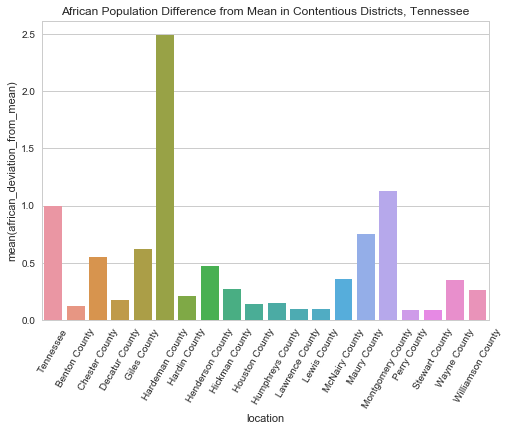

In [122]:
import seaborn as sns
sns.set_style("whitegrid")

ax = sns.barplot(x='location', y='african_deviation_from_mean', data = dists)
ax.set_xticklabels(labels=dists['location'],rotation=60)
ax.set_title('African Population Difference from Mean in Contentious Districts, Tennessee')

sns.plt.show()

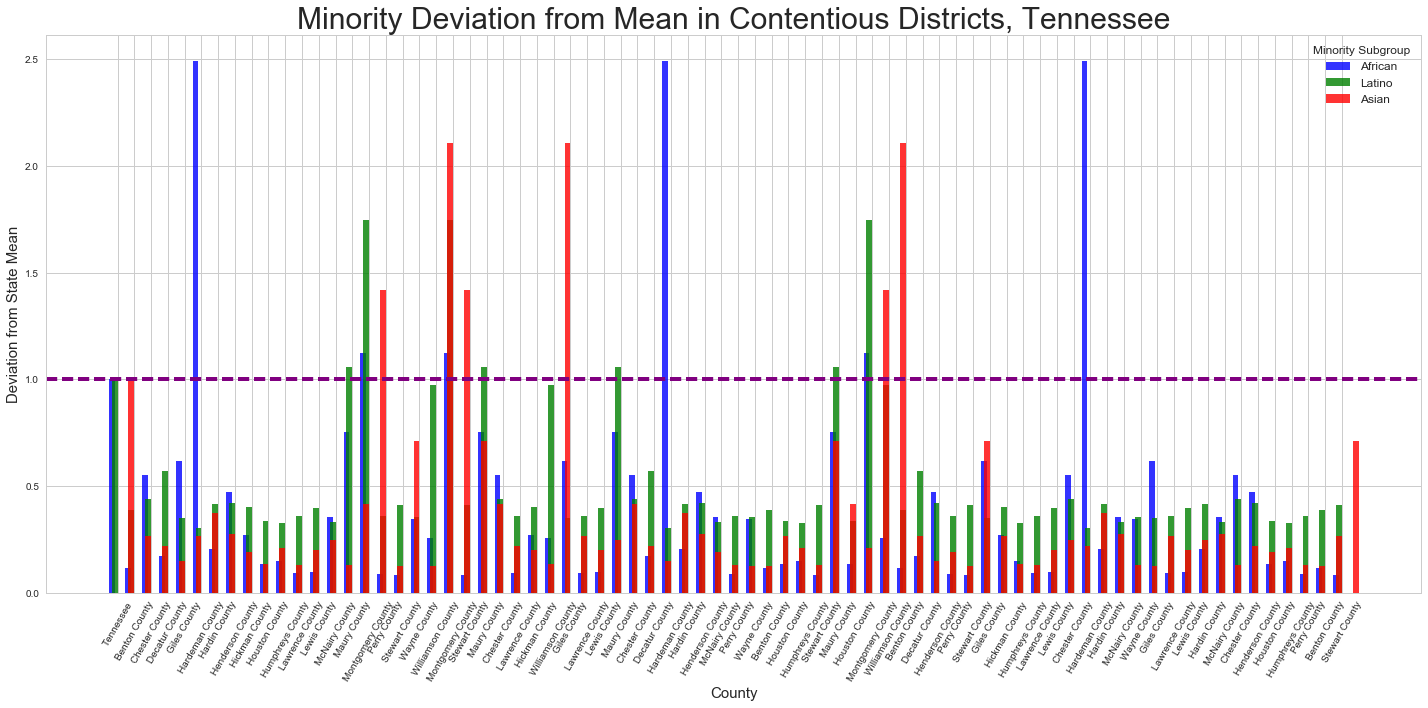

In [123]:
n_groups = dists.shape[0]
african_means = dists['african_deviation_from_mean']
latino_means = dists['latino_deviation_from_mean']
asian_means = dists['asian_deviation_from_mean']
 
# create plot
fig = plt.figure( figsize=(20,10))

#fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, african_means, bar_width,
                 alpha=opacity,
                 color='b',
                 label='African')
 
rects2 = plt.bar(index + bar_width/2, latino_means, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Latino')

rects3 = plt.bar(index + bar_width/2 +1, asian_means, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Asian')
 
plt.xlabel('County',fontsize = 15)
plt.ylabel('Deviation from State Mean',fontsize = 15)
plt.title('Minority Deviation from Mean in Contentious Districts, Tennessee', fontsize = 30)
plt.xticks(index + bar_width, (dists['location']), rotation =60, label = 6)
plt.axhline(y=1, color='purple', linestyle='dashed', linewidth=4)
plt.legend(title = 'Minority Subgroup', fontsize =12)
 
plt.tight_layout()
plt.show()